### Introsuction

1.Partitioning a customer base into groups of individuals based on characteristics 

2.Allows a business to target different groups (high profit&low risk, …)

3.we can cross-reference the groups with their purchases

finding “clusters” in datasets, unsupervised

Cluster: a group of data points or objects in a dataset that are similar to other objects in the group, and dissimilar to datapoints in other clusters.

Different than classficiation:

1.no need to be labeled   

2.Prediction is not the goal


### Samples

Retail & Marketing: identify buying patterns / recommendation systems
 
Banking: Fraud detection / identify clusters (loyal, churn, …)

Insurance: Fraud detection / Risk  

Publication: auto-categorize / recommend

Medicine: characterize behaviour

Biology: group genes / cluster genetic markers (family ties)


### algorithms

Partitioned-based (K-means, K-Median, Fuzzy c-means, …): sphere like clusters / Medium or large data
    
Hierarchical (Agglomerative, Divisive): Trees of clusters / small size datasets
    
Density-based (DBSCAN): arbitrary shaped / good for special clusters or noisy data


### K Means 

Unsupervised, Divides data into K non-overlapping 

subset/cluster without any cluster internal structure

We need to understand the similarity and dissimilarity. 

Golad: minimize intra-cluster distances ( Dis(x1, x2) ) and maximize inter-cluster distances ( Dis(c1, c2) )
    
It is always good to Normalize!

different formulas: Euclidean, Cosine, Average distance, … so first understand the domain knowledge


### implement

decide the number of cluster (K)

init K “centroids” by:
    
   1.random points from the dataset

   2.random points


#### decide the number of cluster (K) init K “centroids” by: random points from the dataset ,random points


Review the algorithm

but how can we evaluate?

External: compare with truth
    
Internal: Average distance between datapoints within a cluster or the distance between clusters
    
Choosing K is difficult so we run with different Ks and check the accuracy (say mean mean distance inside a cluster) BUT decreasing K will always reduces this. So we do the elbow method


#### Objective

There are many models for clustering out there. In this notebook, we will be presenting the model that is considered one of the

simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science 

applications, it is especially useful if you need to quickly discover insights from unlabeled data. In this notebook, you will

learn how to use k-Means for customer segmentation.

Some real-world applications of k-means: Customer segmentation, Understand what the visitors of a website are trying to 

accomplish, Pattern recognition, Machine learning ,Data compression

In this notebook we practice k-means clustering with 2 examples: k-means on a random generated dataset

Using k-means for customer segmentation

#### Import libraries


In [4]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

## k-Means on a randomly generated dataset

First we need to set a random seed. Use numpy's random.seed() function, where the seed will be set to 0.

In [5]:
np.random.seed(0)


Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.


#### Input

###### n_samples:
The total number of points equally divided among clusters.Value will be: 5000

###### centers:
The number of centers to generate, or the fixed center locations.Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]

###### cluster_std:

The standard deviation of the clusters.Value will be: 0.9

##### Output


###### X:
Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.

###### y:  Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [9]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(X)
print(y)


[[-1.84404118 -0.28877401]
 [-3.60739432  0.08772576]
 [ 0.92991426  0.47851945]
 ...
 [-0.32120512  1.0736936 ]
 [ 5.17487478  4.69595765]
 [ 3.55049575  1.48955502]]
[1 1 3 ... 3 0 3]


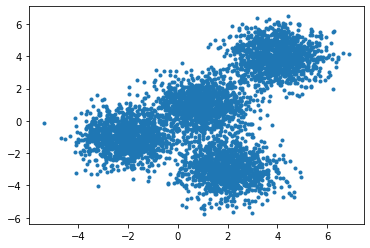

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='.')


## Setting up K-Means


Now that we have our random data, let's set up our K-Means Clustering. The KMeans class has many parameters that can be used, but we will be using these three:



###### init:

Initialization method of the centroids.Value will be: "k-means++"

k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

##### n_clusters:
The number of clusters to form as well as the number of centroids to generate.Value will be: 4 (since we have 4 centers)

###### n_init:
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12

Initialize KMeans with these parameters, where the output parameter is called k_means.



In [10]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)


Now let's fit the KMeans model with the feature matrix we created above, X .



In [11]:
k_means.fit(X)


KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' .labels\_ attribute and save it as k_means_labels .



In [12]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 3, ..., 3, 1, 1])

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers\_ and save it as k_means_cluster_centers .



In [13]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.95489462, -1.03564706],
       [ 3.99211079,  3.99540917],
       [ 2.00811148, -3.01440138],
       [ 1.01557176,  1.03442098]])

### Creating the Visual Plot


So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.

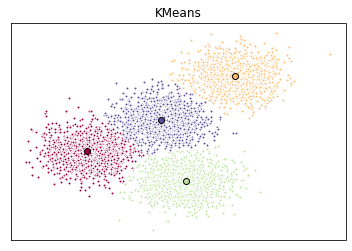

In [15]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_cluster_centers)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

### Pre-processing</h2
As you can see, (For example Address) in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.




In [22]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [23]:
data=pd.read_csv('Logistic Regression/Regresion Logistic.csv')
data.head()

,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy
0,1,4,19,2,5,1,0,1,0,1,2,2,1,1,2,2,2,1
1,1,1,22,1,5,2,2,1,2,1,2,2,2,6,2,2,2,0
2,1,4,24,2,5,1,1,1,0,1,2,2,1,2,1,2,2,0
3,1,2,25,2,5,1,2,1,2,1,2,4,1,6,1,2,2,1
4,1,1,44,2,5,2,8,1,0,1,2,4,2,9,2,2,2,0


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.



In [25]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.83916872, -1.15360705, -0.78118377, ...,  0.23304522,
         0.64407337,  1.18851683],
       [-1.62809077, -0.50232588, -1.2372727 , ...,  0.23304522,
         0.64407337, -0.8413848 ],
       [ 0.83916872, -0.06813843, -0.78118377, ...,  0.23304522,
         0.64407337, -0.8413848 ],
       ...,
       [ 0.83916872, -0.50232588, -1.2372727 , ...,  0.23304522,
         0.64407337, -0.8413848 ],
       [-0.80567094, -0.50232588,  1.04317196, ...,  0.23304522,
         0.64407337, -0.8413848 ],
       [-0.80567094, -1.37070078, -1.2372727 , ...,  0.23304522,
        -1.55261814, -0.8413848 ]])

### Modeling


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take look at cluster labels.

In [26]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 ... 0 1 1]


### Insights
We assign the labels to each row in dataframe.



In [28]:
data["Clus_km"] = labels
data.head(5)


,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy,Clus_km
0,1,4,19,2,5,1,0,1,0,1,2,2,1,1,2,2,2,1,1
1,1,1,22,1,5,2,2,1,2,1,2,2,2,6,2,2,2,0,1
2,1,4,24,2,5,1,1,1,0,1,2,2,1,2,1,2,2,0,1
3,1,2,25,2,5,1,2,1,2,1,2,4,1,6,1,2,2,1,1
4,1,1,44,2,5,2,8,1,0,1,2,4,2,9,2,2,2,0,2


We can easily check the centroid values by averaging the features in each cluster.



In [29]:
data.groupby('Clus_km').mean()


,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy
Clus_km,,,,,,,,,,,,,,,,,,
0,1.160173,3.058874,23.809524,3.632035,12.570563,1.370563,1.643290,0.393074,0.206061,2.521212,1.710823,1.991342,1.845022,2.122078,1.497835,1.950649,1.849351,0.391342
1,1.158072,2.987470,23.650120,3.764337,6.193735,1.292048,1.598072,0.373012,0.138313,1.889157,1.687229,1.816867,1.857349,1.966747,1.581687,1.950361,1.628434,0.437590
2,1.192661,1.990826,42.293578,3.587156,7.972477,1.376147,3.550459,0.669725,0.422018,1.990826,1.743119,2.082569,1.981651,4.651376,1.330275,1.889908,1.688073,0.220183


Now, let's look at the distribution of customers based on their age and income:



<ipython-input-33-eeeddc6c17e0>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


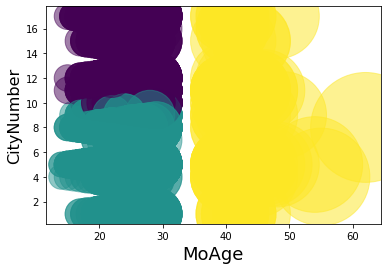

In [33]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('MoAge', fontsize=18)
plt.ylabel('CityNumber', fontsize=16)

plt.show()

<ipython-input-34-0052f1d21260>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


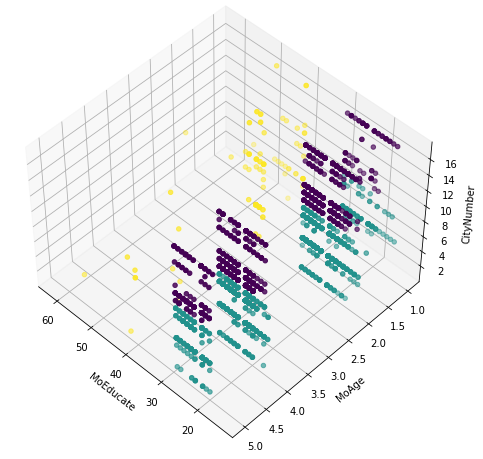

In [34]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('MoEducate')
ax.set_ylabel('MoAge')
ax.set_zlabel('CityNumber')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## Hierarchical Clustering - Agglomerative


Divisive is top down, so you start with all observations in a large cluster and break it down into smaller pieces.

Agglomerative is the opposite of divisive. So it is bottom up, where each observation starts in its own cluster and pairs of clusters are merged together as they move up the hierarchy.


### Hierarchical / More


We should be able to calculate distances between data points (again say age, BMI, BP), but also need the distance “between” clusters:
    
##### 1. Single Linkage Clustering: Minimum distance
##### 2. Complete Linkage Clustering: Maximum distance
##### 3. Average Linkage Clustering: average of distances from each point to all other points
##### 4. Centroid Linkage Clustering: centroids of clusters


###### Pros

1.Works with unknown N

2.Easy to implement

3.Useful dentograms; good for understanding

###### Cons

1.Impossible to undo via algorithm

2.long runtimes

3.sometimes difficult to identify the number of clusters (specially for large datasets)


We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. Remember that agglomerative is the bottom up approach.


In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

#### Generating Random Data

Input these parameters into make_blobs:



##### n_samples:  
The total number of points equally divided among clusters.Choose a number from 10-1500

##### centers:
The number of centers to generate, or the fixed center locations.
Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])

##### cluster_std:
 The standard deviation of the clusters. The larger the number, the further apart the clusters. Choose a number between 0.5-1.5


Save the result to X1 and y1.

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)


Plot the scatter plot of the randomly generated data.



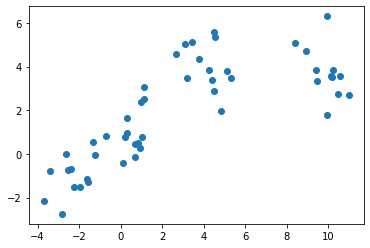

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 


##### Agglomerative Clustering

We will start by clustering the random data points we just created.




The Agglomerative Clustering class will require two inputs:




##### n_clusters: 
The number of clusters to form as well as the number of centroids to generate.
Value will be: 4
##### linkage: 
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. Value will be: 'complete'
##### Note:
It is recommended you try everything with 'average' as well. Save the result to a variable called agglom .

In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')


Fit the model with X2 and y2 from the generated data X1,y1.



In [6]:
agglom.fit(X1,y1)


AgglomerativeClustering(linkage='average', n_clusters=4)

Run the following code to show the clustering! Remember to read the code and comments to gain more understanding on how the plotting works.



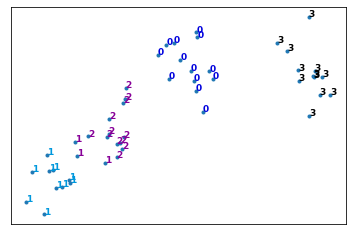

In [7]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Normalize for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

#### Dendrogram Associated for the Agglomerative Hierarchical Clustering


Remember that a distance matrix contains the distance from each point to every other point of a dataset .

Use the function distance_matrix, which requires two inputs. Use the Feature Matrix, X1 as both inputs and save the distance matrix to a variable called dist_matrix

Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.
(print out dist_matrix to make sure it's correct

In [8]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.48979925 0.44369767 ... 0.07766466 0.47376094 0.11207681]
 [0.48979925 0.         0.72571919 ... 0.48879207 0.90599289 0.48438571]
 [0.44369767 0.72571919 0.         ... 0.52091821 0.30190139 0.34169724]
 ...
 [0.07766466 0.48879207 0.52091821 ... 0.         0.53161583 0.1882459 ]
 [0.47376094 0.90599289 0.30190139 ... 0.53161583 0.         0.42797657]
 [0.11207681 0.48438571 0.34169724 ... 0.1882459  0.42797657 0.        ]]


Using the linkage class from hierarchy, pass in the parameters:

1. The distance matrix
2. 'complete' for complete linkage

Save the result to a variable called Z .

In [9]:
Z = hierarchy.linkage(dist_matrix, 'complete')


<ipython-input-9-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

Next, we will save the dendrogram to a variable called dendro. In doing this, the dendrogram will also be displayed. Using the dendrogram class from hierarchy, pass in the parameter

##### Z


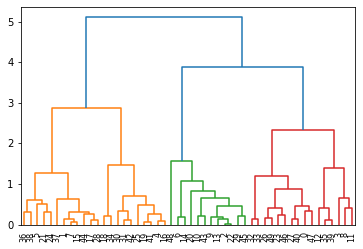

In [10]:
dendro = hierarchy.dendrogram(Z)


In [16]:
filename = 'cars_clus.csv'

#Read csv
data=pd.read_csv('KNN/A - Copy (2).csv')
print ("Shape of dataset: ", data.shape)

data.head(5)


Shape of dataset:  (3339, 18)


,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy
0,1,4,19,3,5,1,0,1,0,1,2,2,1,1,2,2,2,4
1,1,1,33,1,5,2,3,1,2,1,2,2,3,6,2,2,2,1
2,1,4,24,3,5,1,1,1,0,1,2,2,1,2,1,2,2,1
3,1,2,35,3,5,1,2,1,3,1,2,4,1,6,1,2,2,3
4,1,1,44,3,5,2,8,1,0,1,2,4,2,9,2,2,2,1


### Data Cleaning
(perfect) Let's clean the dataset by dropping the rows that have null value:




In [17]:
print ("Shape of dataset before cleaning: ", data.shape)
data[[ 'JobNumber', 'MoEducate', 'MoAge', 'MoBloodGroup', 'CityNumber',
       'TypeDelivery', 'NumberLiveBirth', 'NumberDeathNeonate', 'NumberAboration', 'EthnicNumber', 'familymarrige',
       'Smokingduringpregnancy', 'Smokingparents', 'Previousoutcomepregnanancy']] = data[['JobNumber', 'MoEducate', 'MoAge', 'MoBloodGroup', 'CityNumber',
       'TypeDelivery', 'NumberLiveBirth', 'NumberDeathNeonate', 'NumberAboration', 'EthnicNumber', 'familymarrige',
       'Smokingduringpregnancy', 'Smokingparents', 'Previousoutcomepregnanancy']].apply(pd.to_numeric, errors='coerce')
data = data.dropna()
data = data.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", data.shape)
data.head(5)

Shape of dataset before cleaning:  (3339, 18)
Shape of dataset after cleaning:  (3339, 18)


,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy
0,1,4,19,3,5,1,0,1,0,1,2,2,1,1,2,2,2,4
1,1,1,33,1,5,2,3,1,2,1,2,2,3,6,2,2,2,1
2,1,4,24,3,5,1,1,1,0,1,2,2,1,2,1,2,2,1
3,1,2,35,3,5,1,2,1,3,1,2,4,1,6,1,2,2,3
4,1,1,44,3,5,2,8,1,0,1,2,4,2,9,2,2,2,1


### Feature selection
Let's select our feature set:




In [19]:
featureset = data[['JobNumber', 'MoEducate', 'MoAge','CityNumber',
       'NumberAboration', 'EthnicNumber', 'familymarrige',
       'Smokingduringpregnancy', 'Smokingparents', 'Previousoutcomepregnanancy']]


### Normalization


Now we can normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.



In [20]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 0.75      , 0.10416667, 0.25      , 0.        ,
        0.        , 1.        , 1.        , 1.        , 0.75      ],
       [0.        , 0.        , 0.39583333, 0.25      , 0.16666667,
        0.        , 1.        , 1.        , 1.        , 0.        ],
       [0.        , 0.75      , 0.20833333, 0.25      , 0.        ,
        0.        , 1.        , 1.        , 1.        , 0.        ],
       [0.        , 0.25      , 0.4375    , 0.25      , 0.25      ,
        0.        , 1.        , 1.        , 1.        , 0.5       ],
       [0.        , 0.        , 0.625     , 0.25      , 0.        ,
        0.        , 1.        , 1.        , 1.        , 0.        ]])

### Clustering using Scipy


In [ ]:
In this part we use Scipy package to cluster the dataset.

First, we calculate the distance matrix.

In [21]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

<ipython-input-21-2630f2af58dc>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 1.11258583, 0.75719924, ..., 0.93629037, 0.9651029 ,
        1.65543088],
       [1.11258583, 0.        , 0.79084387, ..., 0.91186664, 0.5077524 ,
        1.57811641],
       [0.75719924, 0.79084387, 0.        , ..., 0.51823426, 0.60560174,
        1.48092618],
       ...,
       [0.93629037, 0.91186664, 0.51823426, ..., 0.        , 0.74548538,
        1.55239013],
       [0.9651029 , 0.5077524 , 0.60560174, ..., 0.74548538, 0.        ,
        1.43855638],
       [1.65543088, 1.57811641, 1.48092618, ..., 1.55239013, 1.43855638,
        0.        ]])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each: - single - complete - average - weighted - centroid

We use complete for our case, but feel free to change it to see how the results change.

In [22]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-22-8655000d21de>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:

In [23]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([322, 338, 422, ..., 412, 336, 161], dtype=int32)

Also, you can determine the number of clusters directly:



In [24]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 3, 2], dtype=int32)

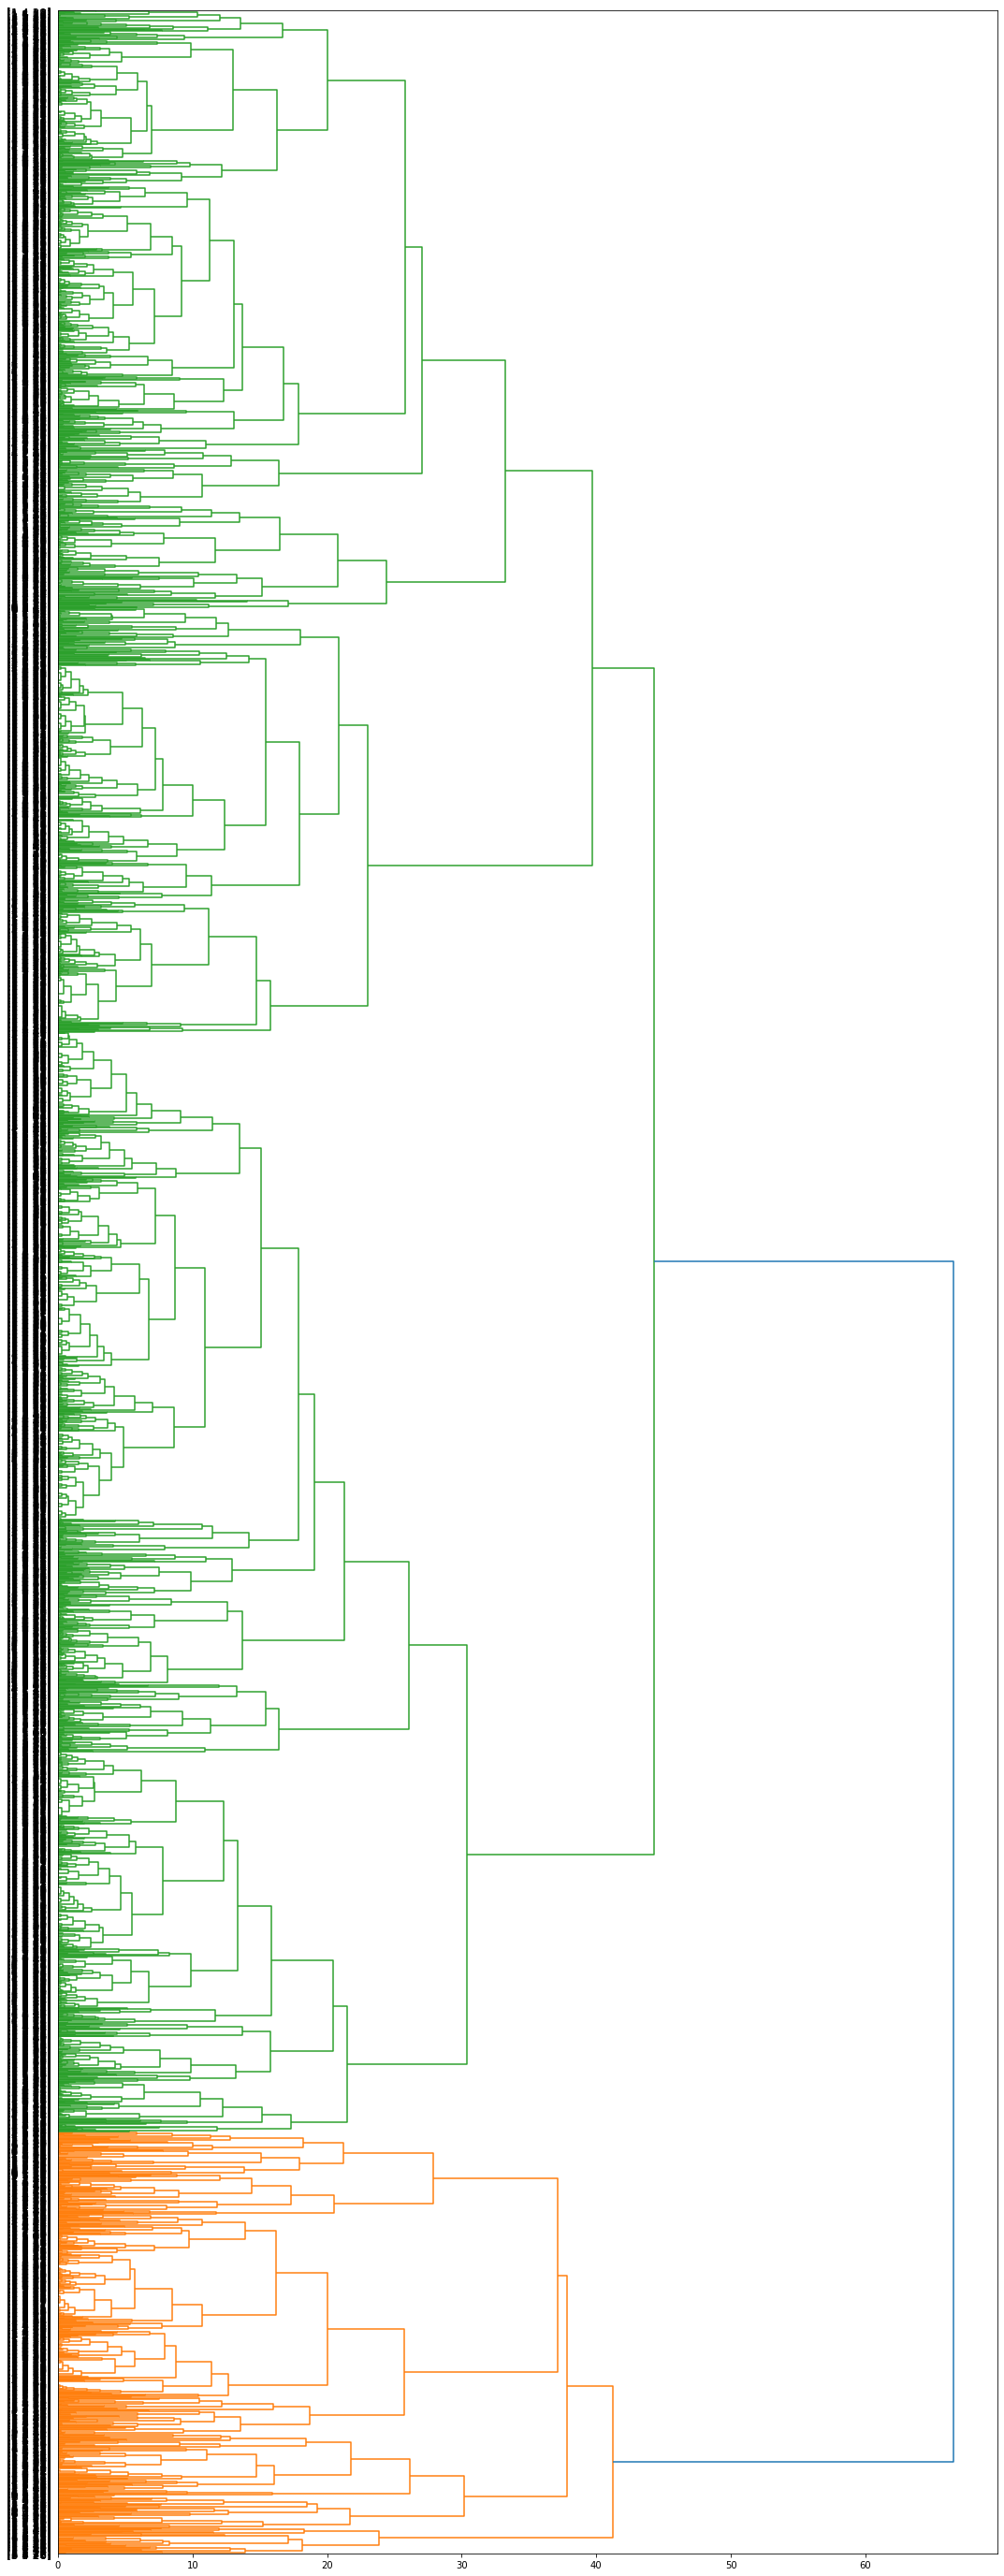

In [26]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['JobNumber'][id], data['MoEducate'][id], int(float(data['MoAge'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Clustering using scikit-learn


In [27]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.11258583 0.75719924 ... 0.93629037 0.9651029  1.65543088]
 [1.11258583 0.         0.79084387 ... 0.91186664 0.5077524  1.57811641]
 [0.75719924 0.79084387 0.         ... 0.51823426 0.60560174 1.48092618]
 ...
 [0.93629037 0.91186664 0.51823426 ... 0.         0.74548538 1.55239013]
 [0.9651029  0.5077524  0.60560174 ... 0.74548538 0.         1.43855638]
 [1.65543088 1.57811641 1.48092618 ... 1.55239013 1.43855638 0.        ]]


In [28]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


<ipython-input-28-bf9ca02f569b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


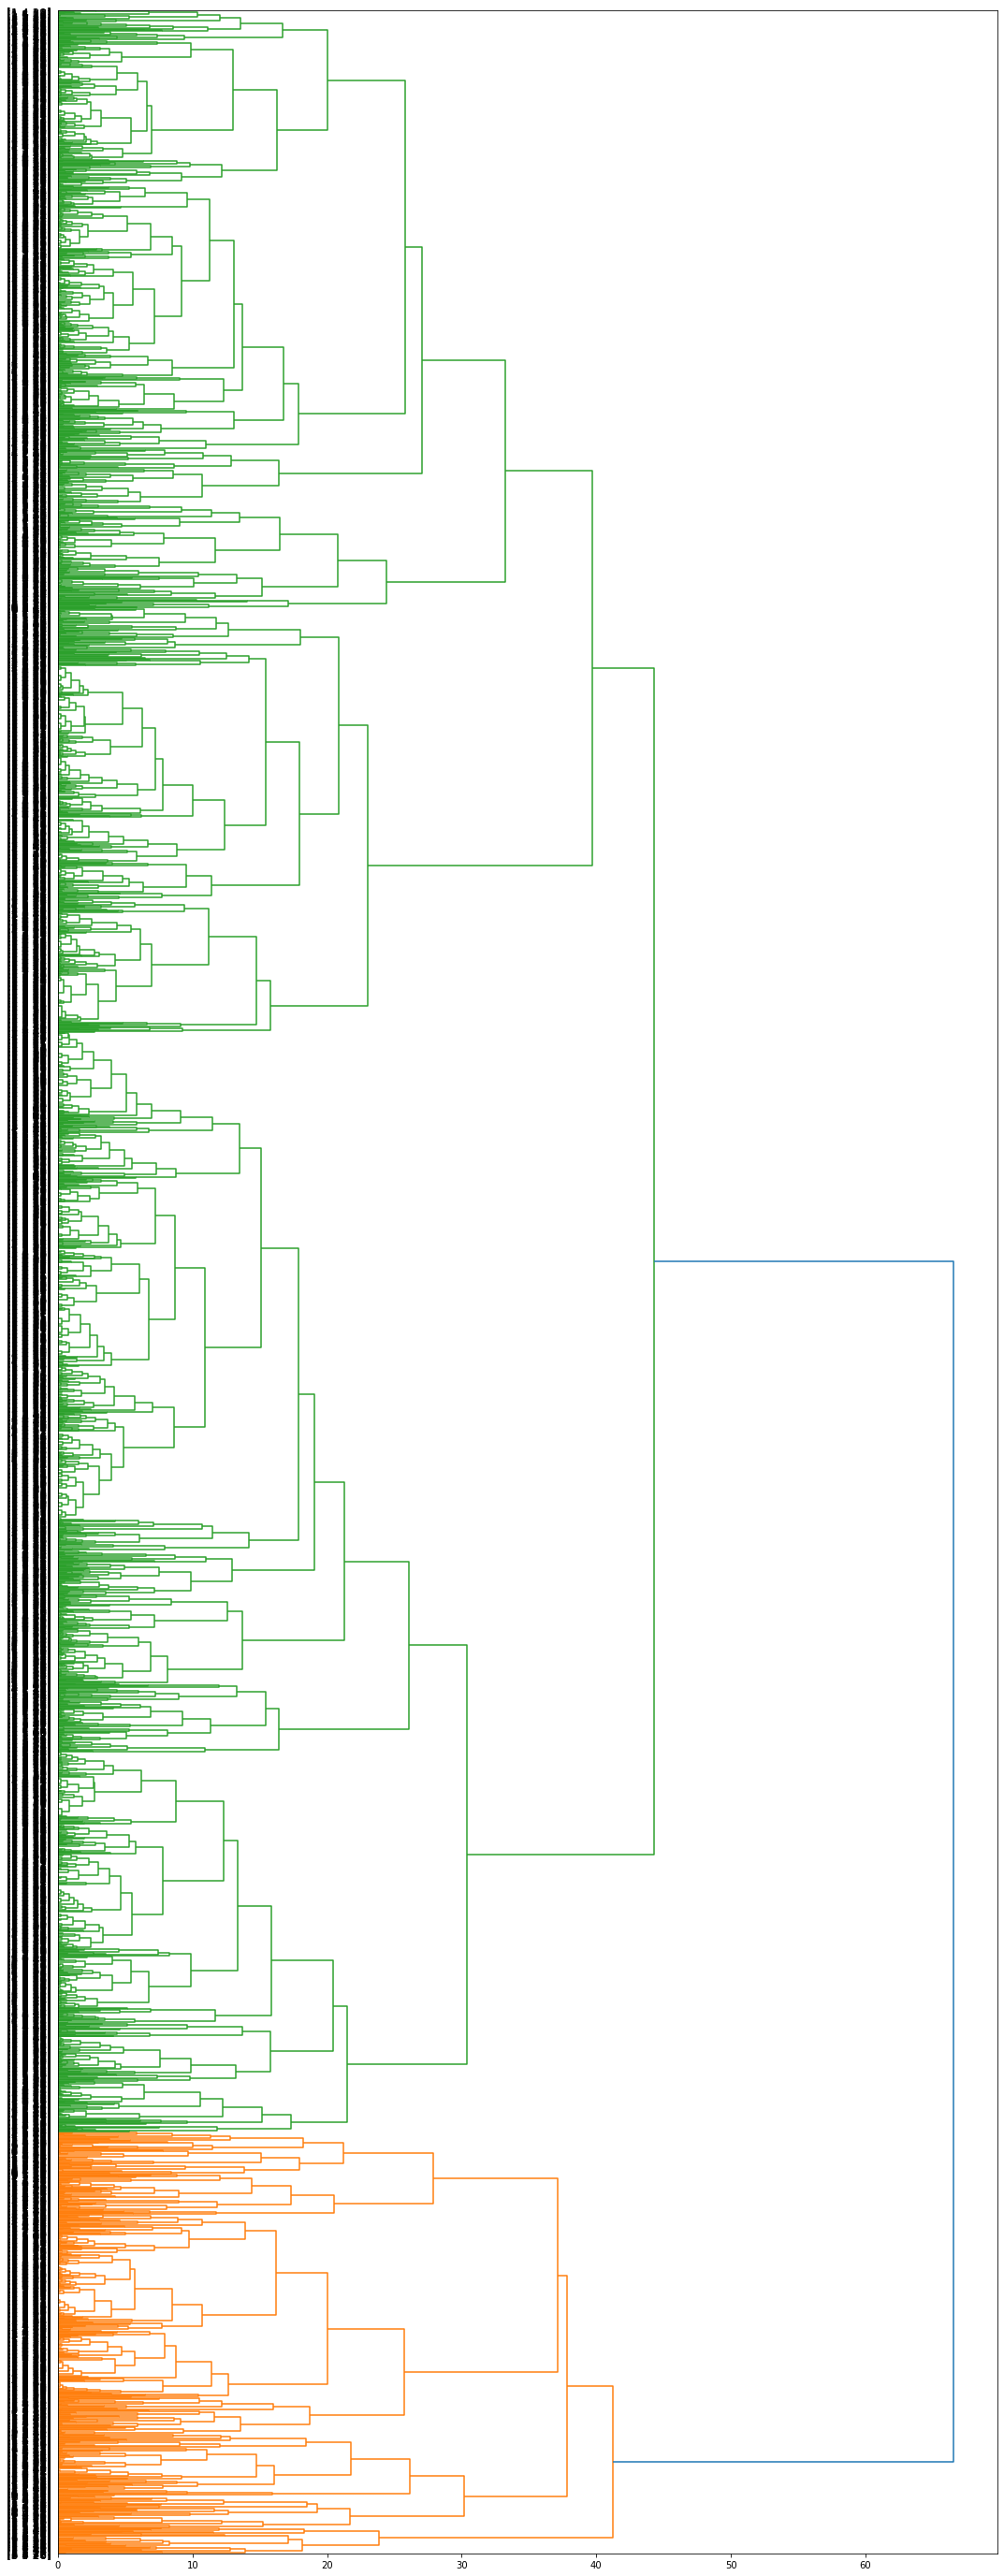

In [29]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['JobNumber'][id], data['MoEducate'][id], int(float(data['MoAge'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

1. Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
2. Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
4. Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [30]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\naz-rah\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

We can add a new field to our dataframe to show the cluster of each row:



In [32]:
data['cluster_'] = agglom.labels_
data.head()

,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy,cluster_
0,1,4,19,3,5,1,0,1,0,1,2,2,1,1,2,2,2,4,2
1,1,1,33,1,5,2,3,1,2,1,2,2,3,6,2,2,2,1,2
2,1,4,24,3,5,1,1,1,0,1,2,2,1,2,1,2,2,1,2
3,1,2,35,3,5,1,2,1,3,1,2,4,1,6,1,2,2,3,2
4,1,1,44,3,5,2,8,1,0,1,2,4,2,9,2,2,2,1,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'MoEducate')

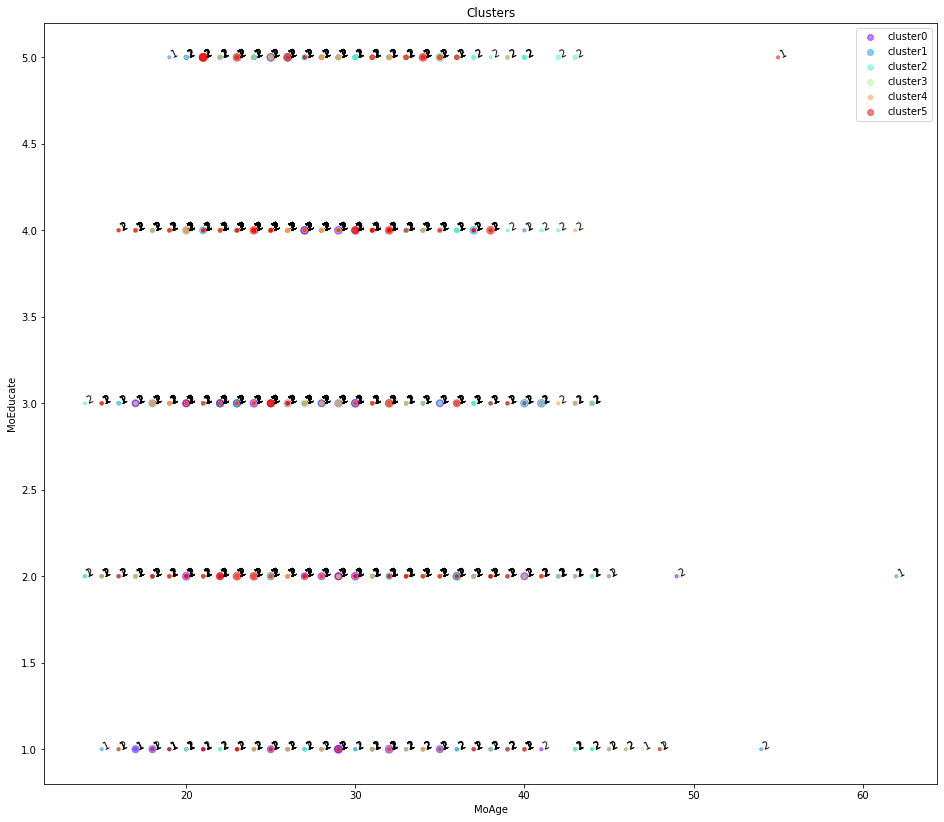

In [44]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    for i in subset.index:
            plt.text(subset.MoAge[i], subset.MoEducate[i],str(subset['familymarrige'][i]), rotation=25) 
    plt.scatter(subset.MoAge, subset.MoEducate, s= subset.JobNumber*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('MoAge')
plt.ylabel('MoEducate')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 0 in the type column). So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:

In [46]:
data.groupby(['cluster_','TypeDelivery'])['cluster_'].count()

cluster_  TypeDelivery
0         1               272
          2               124
1         1               500
          2               285
2         1               965
          2               479
3         1                30
          2                 4
4         1               421
          2               136
5         1                76
          2                47
Name: cluster_, dtype: int64

Now we can look at the characteristics of each cluster:



In [48]:
agg_data = data.groupby(['cluster_','TypeDelivery'])['MoAge','Smokingduringpregnancy','MoEducate','taneshlife'].mean()
agg_data

<ipython-input-48-04028c0414e3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_data = data.groupby(['cluster_','TypeDelivery'])['MoAge','Smokingduringpregnancy','MoEducate','taneshlife'].mean()


MoAge  Smokingduringpregnancy  MoEducate  \
cluster_ TypeDelivery                                                 
0        1             26.569853                1.860294   2.801471   
         2             27.491935                1.879032   3.137097   
1        1             26.654000                2.000000   3.104000   
         2             28.694737                2.000000   3.263158   
2        1             27.397927                2.000000   3.350259   
         2             28.951983                2.000000   3.521921   
3        1             29.266667                1.033333   2.600000   
         2             24.250000                1.000000   2.250000   
4        1             25.771971                2.000000   3.106888   
         2             27.970588                2.000000   3.198529   
5        1             27.526316                1.276316   2.921053   
         2             29.021277                1.340426   3.127660   

                       taneshlife  
cluster_ TypeDelivery              
0        1               2.213235  
         2               2.145161  
1        1               1.952000  
         2               1.926316  
2        1               2.056995  
         2               2.048017  
3        1               2.233333  
         2               2.250000  
4        1               2.256532  
         2               2.183824  
5        1               2.171053  
         2               2.319149

Please notice that we did not use TypeDelivery and taneshlife in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite a high accuracy

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'MoEducate')

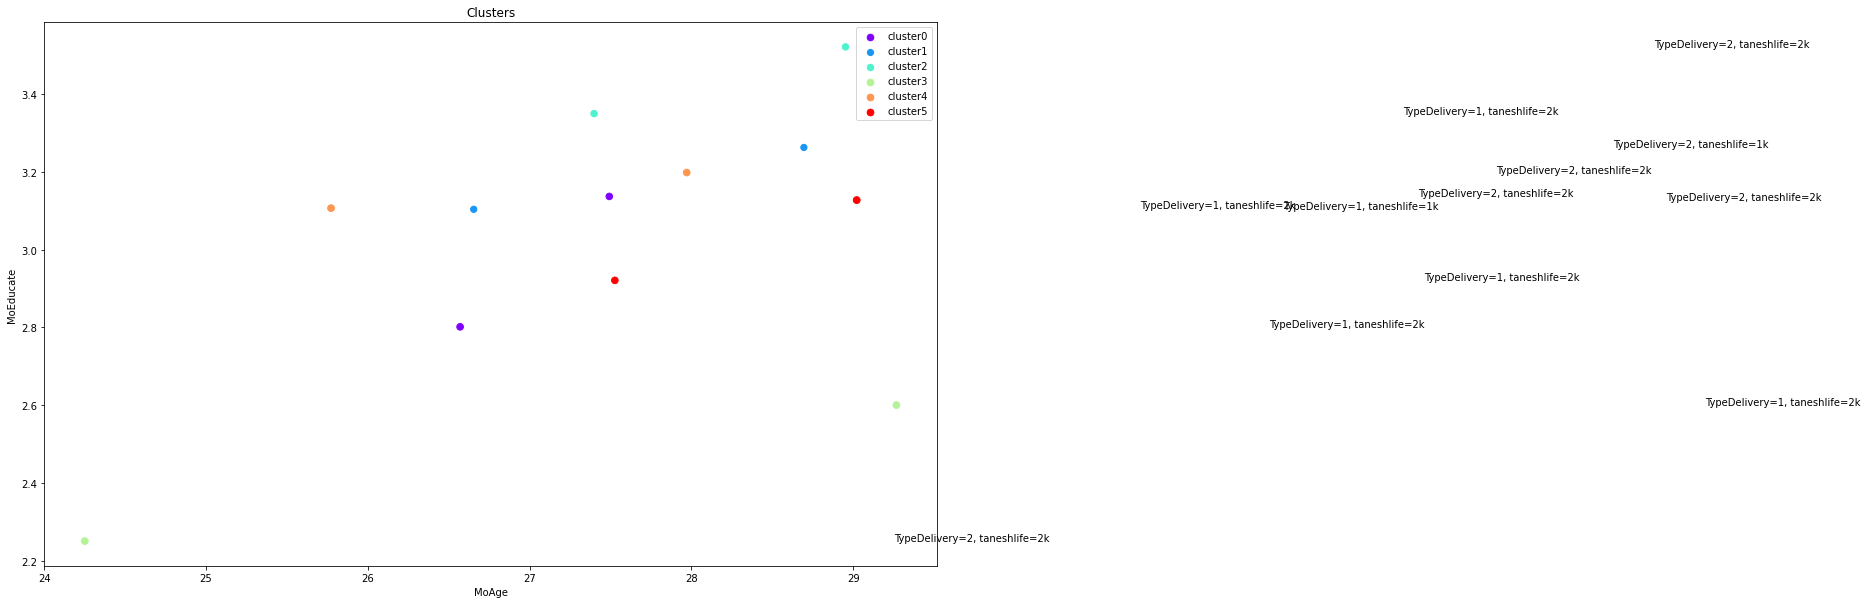

In [50]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_data.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'TypeDelivery='+str(int(i)) + ', taneshlife='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.MoAge, subset.MoEducate, s=subset.taneshlife*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('MoAge')
plt.ylabel('MoEducate')

### Clustering DBSCAN


1. DBSCAN algorithms is effective for tasks like class identification
2. effective even in presence of noise
3. Grouping same weather on dense areas


###### point types:
1. core: within our neighborhood of the point there are at least M points. 
2. Border:
less than M in neighborhood
reachable from a core point
3. outlier is not core neigher a border


Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.



In [52]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

#### Data generation
The function below will generate the data points and requires these inputs:

###### centroidLocation:
Coordinates of the centroids that will generate the random data.
Example: input: [[4,3], [2,-1], [-1,4]]
###### numSamples: 
The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation)
Example: 1500
###### clusterDeviation: 
The standard deviation of the clusters. The larger the number, the further the spacing of the data points within the clusters.
Example: 0.5

In [53]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Use createDataPoints with the 3 inputs and store the output into variables X and y.



In [55]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)
print(X)
print(y)


[[ 1.03445964  0.23660296]
 [-1.4467304   1.36988053]
 [-1.23138598  1.13701028]
 ...
 [ 0.99223515  0.69264875]
 [ 0.07252604 -1.98909319]
 [ 1.46931146  0.38068014]]
[0 2 2 ... 0 1 0]


##### Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points\ Epsilon determine a specified radius that if includes enough number of points within, we call it dense area\ minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

In [56]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 1, ..., 0, 2, 0], dtype=int64)

#### Distinguish outliers
Let's Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.



In [57]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [58]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

6

In [59]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

#### Data visualization


In [60]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


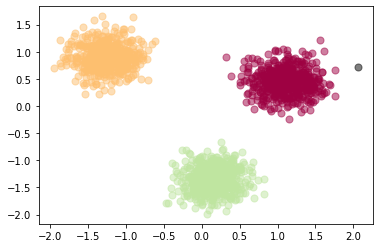

In [61]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)